Metin Abadan - 19050111015

Sertac İnce - 20050111003

Importing libraries and splitting data

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


In [2]:

df = pd.read_csv("HW3Data.csv")

In [3]:
df.tail()

,Days_Corn,Days_Cotton,Corn_NDVI_2013,Cotton_NDVI_2013,Corn_MSAVI_2013,Cotton_MSAVI_2013,Corn_EVI_2013,Cotton_EVI_2013,Corn_NDVI_2014,Cotton_NDVI_2014,Corn_MSAVI_2014,Cotton_MSAVI_2014,Corn_EVI_2014,Cotton_EVI_2014
35,230,208,0.791247,0.756257,0.555672,0.594738,0.562380,0.606048,0.813649,0.810621,0.607183,0.665758,0.618382,0.681522
36,231,209,0.795709,0.765618,0.558805,0.606414,0.565638,0.618193,0.811241,0.816126,0.603498,0.675572,0.615209,0.691938
37,232,210,0.800170,0.774979,0.561939,0.618090,0.568896,0.630339,0.808834,0.821631,0.599813,0.685387,0.612037,0.702354
38,233,211,0.804632,0.784340,0.565072,0.629766,0.572154,0.642485,0.806426,0.827137,0.596128,0.695202,0.608864,0.712770
39,234,212,0.809093,0.789300,0.568205,0.635215,0.575412,0.647542,0.804018,0.832642,0.592443,0.705016,0.605691,0.723186


In [4]:
day_corn = df["Days_Corn"]
day_cotton = df["Days_Cotton"]

ndvi_corn13 = df["Corn_NDVI_2013"]
ndvi_cotton13 = df["Cotton_NDVI_2013"]

msavi_corn13 = df["Corn_MSAVI_2013"]
msavi_cotton13 = df["Cotton_MSAVI_2013"]

evi_corn13 = df["Corn_EVI_2013"]
evi_cotton13 = df["Cotton_EVI_2013"]

ndvi_corn14 = df["Corn_NDVI_2014"]
ndvi_cotton14 = df["Cotton_NDVI_2014"]

msavi_corn14 = df["Corn_MSAVI_2014"]
msavi_cotton14 = df["Cotton_MSAVI_2014"]

evi_corn14 = df["Corn_EVI_2014"]
evi_cotton14 = df["Cotton_EVI_2014"]

# QUESTION 1

### NDVI13 for Corn Data Using Sklearn

Let's see our data

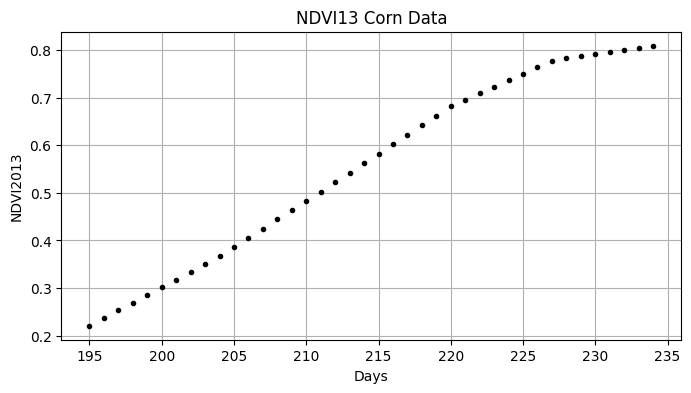

In [5]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,4))
plt.plot(day_corn, ndvi_corn13, "k.")
plt.title("NDVI13 Corn Data")
plt.grid()

plt.xlabel("Days")
plt.ylabel("NDVI2013");



Now we will apply linear regression for this data

In [6]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(day_corn, ndvi_corn13, test_size = 0.2)

In [7]:
from sklearn.linear_model import LinearRegression



In [8]:
model_corn_ndvi13 = LinearRegression()

model_corn_ndvi13.fit(X_train1.values.reshape(-1, 1), y_train1.values.reshape(-1, 1))


LinearRegression()

In [9]:
yhat_corn_ndvi13 = model_corn_ndvi13.predict(X_test1.values.reshape(-1, 1))

Let's take a look at the line that is fitted

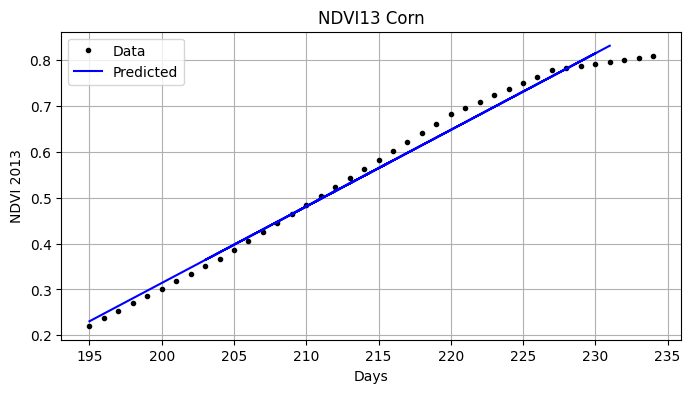

In [10]:

fig = plt.figure(figsize=(8,4))
plt.plot(day_corn, ndvi_corn13, "k.", label="Data")
plt.plot(X_test1, yhat_corn_ndvi13, "b-", label="Predicted")
plt.title("NDVI13 Corn")
plt.xlabel("Days")
plt.ylabel("NDVI 2013")
plt.legend()
plt.grid()

Checking the R2 Score

In [11]:
r2_score(y_test1.values.reshape(-1, 1), yhat_corn_ndvi13)

0.9904481929169381

### NDVI13 for Corn Data Using Manual Calculations

In this section, we will do a line fit to our data without using the Sklearn library.

In [12]:
X_b1 = np.c_[np.ones((len(day_corn), 1)), day_corn]

w_estimate1 = np.linalg.inv(X_b1.T.dot(X_b1)).dot(X_b1.T).dot(ndvi_corn13) # Here, it is working like fit function

x_new1 = np.array([[195], [234]])

x_new_b1 = np.c_[np.ones((2, 1)), x_new1] 

y_predict1 = x_new_b1.dot(w_estimate1)  # This works like predict function        



In [13]:
y_predict1

array([0.23150492, 0.87799607])

#### The function we wrote to compare coefficients and intercepts

This function was created to find the coefficient and the intercept of the line whose two points are known.

By simply dividing the difference between the y values by the difference between the x values, it finds line's intercept with the coefficient value it finds.

In [14]:
def calculateCI(arrx, arry):
    coeff = (arry[1] - arry[0]) / (arrx[1][0] - arrx[0][0])
    intercept = arry[0] - (coeff * arrx[0][0])

    return [coeff, intercept]

### Comparison of Manual and Sklearn Calculations (NDVI13 Corn)

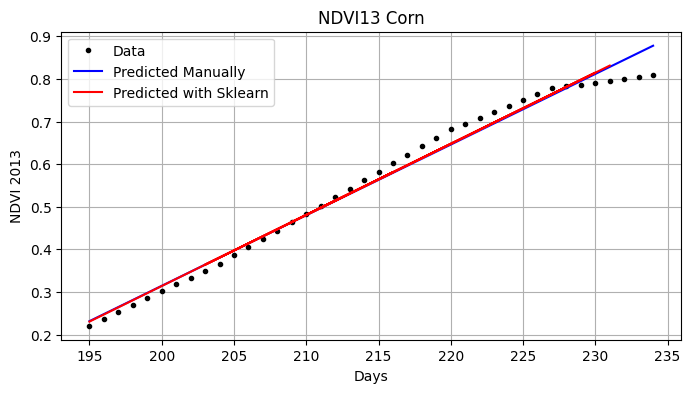

In [15]:
fig = plt.figure(figsize=(8,4))

plt.plot(day_corn, ndvi_corn13, "k.", label="Data")
plt.plot(x_new1, y_predict1, "b-", label="Predicted Manually")
plt.plot(X_test1, yhat_corn_ndvi13, "r-", label="Predicted with Sklearn")
plt.title("NDVI13 Corn")
plt.xlabel("Days")
plt.ylabel("NDVI 2013")
plt.legend()
plt.grid()

In [16]:
calculateCI(x_new1, y_predict1)

[0.016576696179456417, -3.0009508346684157]

In [17]:
model_corn_ndvi13.coef_[0][0], model_corn_ndvi13.intercept_[0]

(0.01669059354239344, -3.0241691902146908)

As we can see, our manual prediction line and sklearn's prediction line is very close to each other

### NDVI13 for Cotton Data Using Sklearn

We will apply the same steps for cotton data.

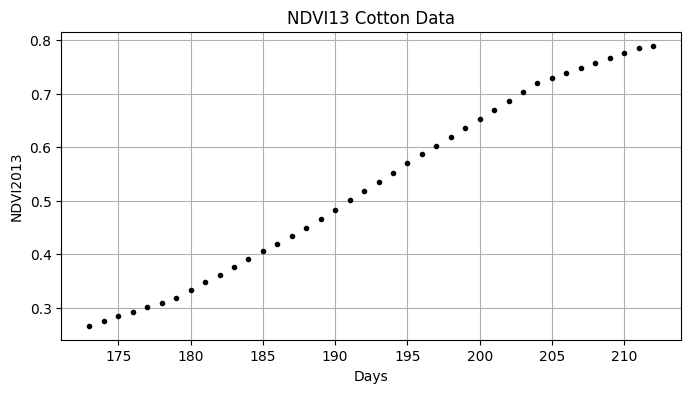

In [18]:
fig = plt.figure(figsize=(8,4))
plt.plot(day_cotton, ndvi_cotton13, "k.")
plt.title("NDVI13 Cotton Data")
plt.grid()

plt.xlabel("Days")
plt.ylabel("NDVI2013");

In [114]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(day_cotton, ndvi_cotton13, test_size = 0.2)

In [115]:
model_cotton_ndvi13 = LinearRegression()

model_cotton_ndvi13.fit(X_train2.values.reshape(-1, 1), y_train2.values.reshape(-1, 1))


LinearRegression()

In [116]:
yhat_cotton_ndvi13 = model_cotton_ndvi13.predict(X_test2.values.reshape(-1, 1))

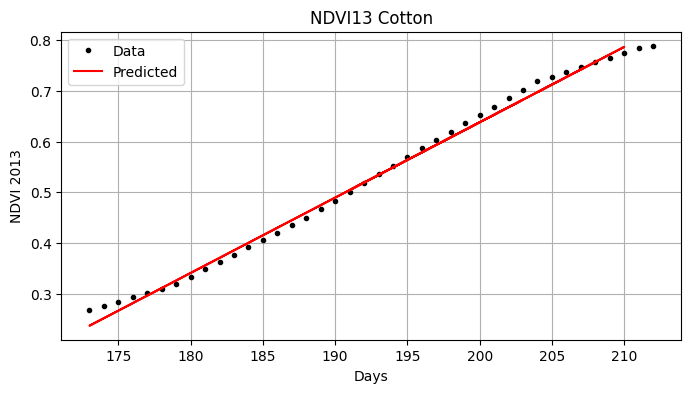

In [117]:
fig = plt.figure(figsize=(8,4))
plt.plot(day_cotton, ndvi_cotton13, "k.", label="Data")
plt.plot(X_test2, yhat_cotton_ndvi13, "r-", label="Predicted")
plt.title("NDVI13 Cotton")
plt.xlabel("Days")
plt.ylabel("NDVI 2013")
plt.legend()
plt.grid()

Checking R2 Score

In [118]:
r2_score(y_test2.values.reshape(-1, 1), yhat_cotton_ndvi13)

0.9922458723816576

### NDVI13 for Cotton Data Using Manual Calculations

In [119]:
X_b2 = np.c_[np.ones((len(day_cotton), 1)), day_cotton]

w_estimate2 = np.linalg.inv(X_b2.T.dot(X_b2)).dot(X_b2.T).dot(ndvi_cotton13) 

x_new2 = np.array([[173], [212]])

x_new_b2 = np.c_[np.ones((2, 1)), x_new2] 

y_predict2 = x_new_b2.dot(w_estimate2)          



### Comparison of Manual and Sklearn Calculations (NDVI13 Cotton)

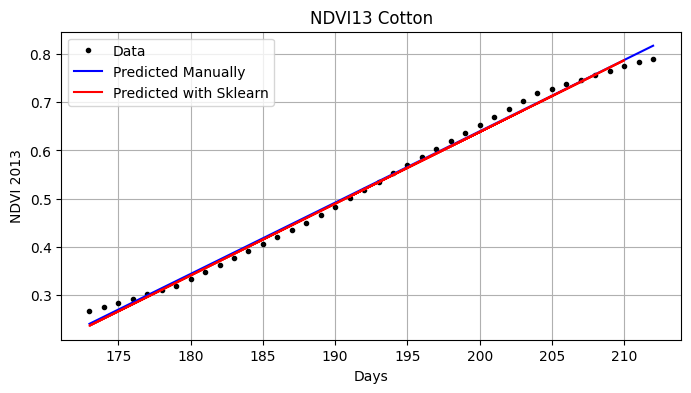

In [120]:
fig = plt.figure(figsize=(8,4))

plt.plot(day_cotton, ndvi_cotton13, "k.", label="Data")
plt.plot(x_new2, y_predict2, "b-", label="Predicted Manually")
plt.plot(X_test2, yhat_cotton_ndvi13, "r-", label="Predicted with Sklearn")
plt.title("NDVI13 Cotton")
plt.xlabel("Days")
plt.ylabel("NDVI 2013")
plt.legend()
plt.grid()

In [26]:
calculateCI(x_new2, y_predict2)

[0.014786231674296327, -2.317541554652049]

In [27]:
model_cotton_ndvi13.coef_[0][0], model_cotton_ndvi13.intercept_[0]

(0.014886633207265316, -2.3357964426901727)

As we can see, our manual prediction line and sklearn's prediction line is almost the same

# QUESTION 2

In this section, we will predict 2013 MSAVI and 2013 EVI data using 2013 NDVI data.
Then we'll see how logical it would be to use this data according to R2.

## Corn Data

### MSAVI 2013 Using NDVI 2013

In [28]:

model_corn_msavi = LinearRegression()
model_corn_msavi.fit(ndvi_corn13.values.reshape(-1, 1), msavi_corn13.values.reshape(-1, 1))

yhat_corn_msavi = model_corn_msavi.predict(ndvi_corn13.values.reshape(-1, 1))


In [29]:
r2_score(evi_corn13.values.reshape(-1, 1), yhat_corn_msavi)

0.9932362521696605

In [121]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(ndvi_corn13, yhat_corn_msavi, test_size = 0.2)

In [122]:
model_corn_msavi_ndvi = LinearRegression()

model_corn_msavi_ndvi.fit(X_train3.values.reshape(-1, 1), y_train3)

yhat_corn_msavi_ndvi = model_corn_msavi_ndvi.predict(X_test3.values.reshape(-1, 1))

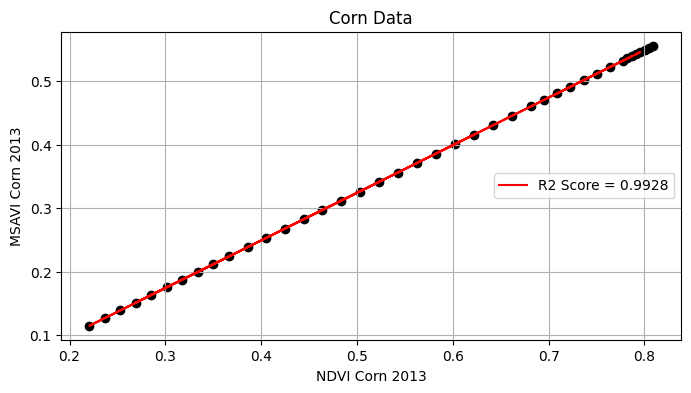

In [123]:
fig = plt.figure(figsize=(8,4))

plt.scatter(ndvi_corn13, yhat_corn_msavi, color="black")
plt.plot(X_test3, yhat_corn_msavi_ndvi, "r-", label = 'R2 Score = %0.4f' % r2_score(msavi_corn13.values.reshape(-1, 1), yhat_corn_msavi))
plt.title("")
plt.xlabel("NDVI Corn 2013") 
plt.ylabel("MSAVI Corn 2013") 
plt.title("Corn Data")
plt.legend(loc="center right")
plt.grid()

Here we can compare with excel output: 


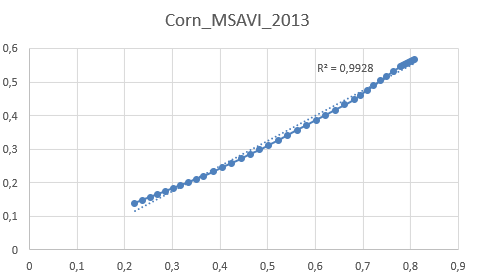




We see that we have a consistent approach according to excel data.

### Manual Calculation Part

In [33]:
X_b3 = np.c_[np.ones((len(msavi_corn13), 1)), msavi_corn13]

In [34]:
w_estimate3 = np.linalg.inv(X_b3.T.dot(X_b3)).dot(X_b3.T).dot(ndvi_corn13) 

In [35]:
x_new3 = np.array([[0.13], [0.56]])
x_new_b3 = np.c_[np.ones((2, 1)), x_new3]

y_predict3 = x_new_b3.dot(w_estimate3)     

In [36]:
y_predict3

array([0.24281552, 0.81305018])

### Comparison of Manual and Sklearn Calculations

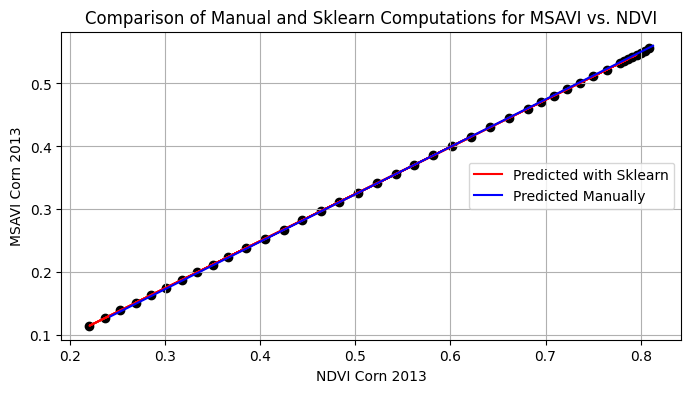

In [124]:
fig = plt.figure(figsize=(8,4))

plt.scatter(ndvi_corn13, yhat_corn_msavi, color="black")
plt.plot(X_test3, yhat_corn_msavi_ndvi, "r-", label="Predicted with Sklearn")
plt.plot(y_predict3, x_new3, "b-", label="Predicted Manually")
plt.xlabel("NDVI Corn 2013") 
plt.ylabel("MSAVI Corn 2013") 
plt.title("Comparison of Manual and Sklearn Computations for MSAVI vs. NDVI")
plt.legend(loc="center right")
plt.grid()

In [38]:
calculateCI(x_new3, y_predict3)

[1.3261271063402211, 0.07041899616097791]

In [39]:
model_corn_msavi_ndvi.coef_[0][0], model_corn_msavi_ndvi.intercept_[0]

(0.7486753399600088, -0.05010548395476533)

As we can see, our manual prediction line and sklearn's prediction line is not very close to each other this time.

### EVI 2013 Using NDVI 2013

In [40]:

model_corn_evi = LinearRegression()
model_corn_evi.fit(ndvi_corn13.values.reshape(-1, 1), evi_corn13.values.reshape(-1, 1))

yhat_corn_evi = model_corn_evi.predict(ndvi_corn13.values.reshape(-1, 1))


In [41]:
r2_score(evi_corn13.values.reshape(-1, 1), yhat_corn_evi)

0.9945887076912174

In [134]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(ndvi_corn13, yhat_corn_evi, test_size = 0.2)

In [135]:
model_corn_evi_ndvi = LinearRegression()

model_corn_evi_ndvi.fit(X_train4.values.reshape(-1, 1), y_train4)

yhat_corn_evi_ndvi = model_corn_evi_ndvi.predict(X_test4.values.reshape(-1, 1))

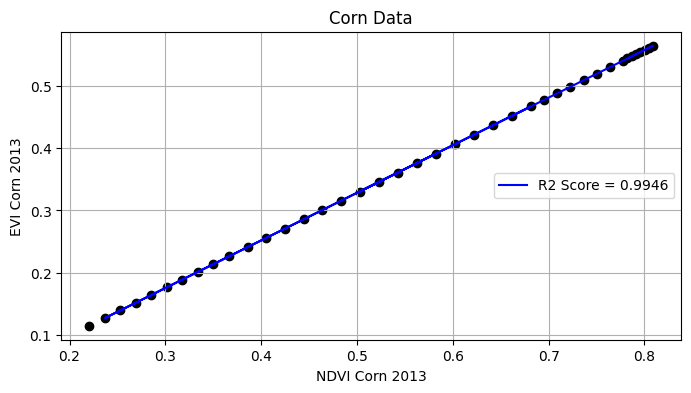

In [136]:
fig = plt.figure(figsize=(8,4))

plt.scatter(ndvi_corn13, yhat_corn_evi, color="black")
plt.plot(X_test4, yhat_corn_evi_ndvi, "b-", label = 'R2 Score = %0.4f' % r2_score(evi_corn13.values.reshape(-1, 1), yhat_corn_evi))
plt.title("")
plt.xlabel("NDVI Corn 2013") 
plt.ylabel("EVI Corn 2013") 
plt.legend(loc="center right")
plt.title("Corn Data")
plt.grid()

Here we can compare with excel output: 

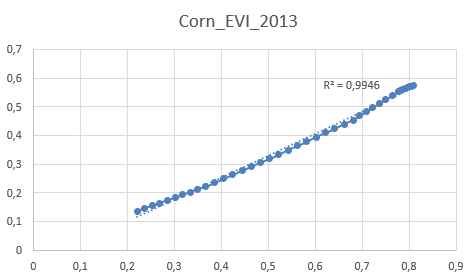

We see that we have a consistent approach according to excel data.

### Manual Calculation Part

In [45]:
X_b4 = np.c_[np.ones((len(evi_corn13), 1)), evi_corn13]

In [46]:
w_estimate4 = np.linalg.inv(X_b4.T.dot(X_b4)).dot(X_b4.T).dot(ndvi_corn13) 

In [47]:
x_new4 = np.array([[0.13], [0.57]])
x_new_b4 = np.c_[np.ones((2, 1)), x_new4]

y_predict4 = x_new_b4.dot(w_estimate4)     

In [48]:
y_predict4

array([0.24176594, 0.81570141])

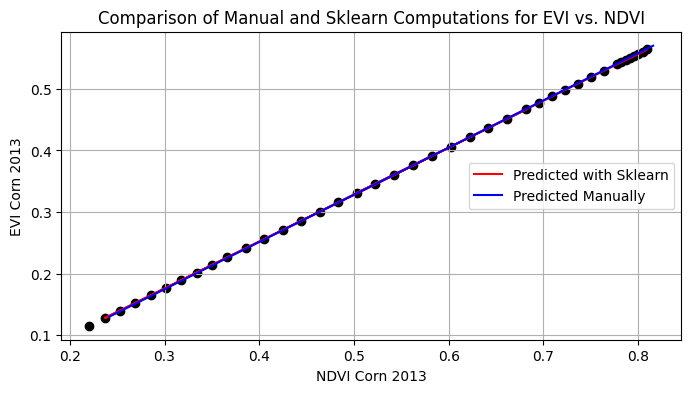

In [137]:
fig = plt.figure(figsize=(8,4))

plt.scatter(ndvi_corn13, yhat_corn_evi, color="black")
plt.plot(X_test4, yhat_corn_evi_ndvi, "r-", label="Predicted with Sklearn")
plt.plot(y_predict4, x_new4, "b-", label="Predicted Manually")
plt.xlabel("NDVI Corn 2013") 
plt.ylabel("EVI Corn 2013") 
plt.title("Comparison of Manual and Sklearn Computations for EVI vs. NDVI")
plt.legend(loc="center right")
plt.grid()

In [50]:
calculateCI(x_new4, y_predict4)

[1.3043987874457996, 0.072194097173822]

In [51]:
model_corn_evi_ndvi.coef_[0][0], model_corn_evi_ndvi.intercept_[0]

(0.762488218529215, -0.053045265564802935)

As we can see again, our manual prediction line and sklearn's prediction line is not very close to each other this time.

## Cotton Data

### MSAVI 2013 Using NDVI 2013

In [52]:

model_cotton_msavi = LinearRegression()
model_cotton_msavi.fit(ndvi_cotton13.values.reshape(-1, 1), msavi_cotton13.values.reshape(-1, 1))

yhat_cotton_msavi = model_cotton_msavi.predict(ndvi_cotton13.values.reshape(-1, 1))


In [53]:
r2_score(msavi_cotton13.values.reshape(-1, 1), yhat_cotton_msavi)

0.9947662961054202

In [54]:
X_train5, X_test5, y_train5, y_test5 = train_test_split(ndvi_cotton13, yhat_cotton_msavi, test_size = 0.2)

In [55]:
model_cotton_msavi_ndvi = LinearRegression()

model_cotton_msavi_ndvi.fit(X_train5.values.reshape(-1, 1), y_train5)

yhat_cotton_msavi_ndvi = model_cotton_msavi_ndvi.predict(X_test5.values.reshape(-1, 1))

### Comparison of Manual and Sklearn Calculations

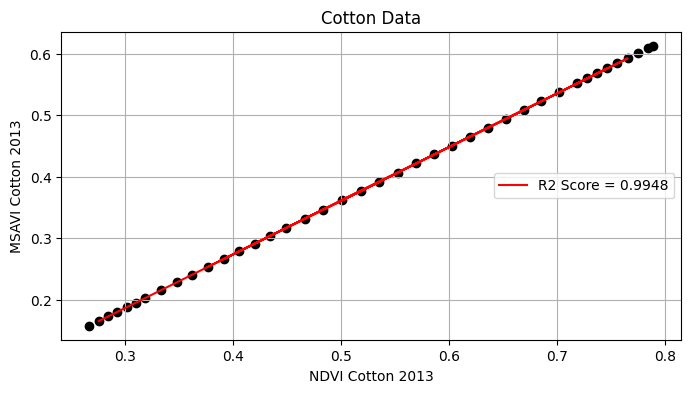

In [56]:
fig = plt.figure(figsize=(8,4))

plt.scatter(ndvi_cotton13, yhat_cotton_msavi, color="black")
plt.plot(X_test5, yhat_cotton_msavi_ndvi, "r-", label = 'R2 Score = %0.4f' % r2_score(msavi_cotton13.values.reshape(-1, 1), yhat_cotton_msavi))
plt.title("")
plt.xlabel("NDVI Cotton 2013") 
plt.ylabel("MSAVI Cotton 2013") 
plt.title("Cotton Data")
plt.legend(loc="center right")
plt.grid()

Here we can compare with excel output: 

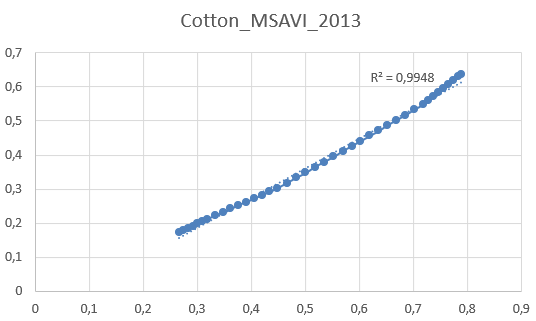





We see that we have a consistent approach according to excel data.

### Manual Calculation Part

In [57]:
X_b5 = np.c_[np.ones((len(msavi_cotton13), 1)), msavi_cotton13]

In [58]:
w_estimate5 = np.linalg.inv(X_b5.T.dot(X_b5)).dot(X_b5.T).dot(ndvi_cotton13) 

In [59]:
x_new5 = np.array([[0.17], [0.63]])
x_new_b5 = np.c_[np.ones((2, 1)), x_new5]

y_predict5 = x_new_b5.dot(w_estimate5)     

In [60]:
y_predict5

array([0.28251128, 0.80737943])

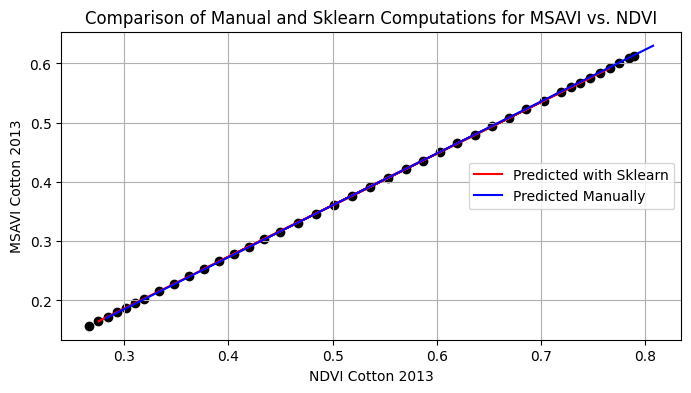

In [61]:
fig = plt.figure(figsize=(8,4))

plt.scatter(ndvi_cotton13, yhat_cotton_msavi, color="black")
plt.plot(X_test5, yhat_cotton_msavi_ndvi, "r-", label="Predicted with Sklearn")
plt.plot(y_predict5, x_new5, "b-", label="Predicted Manually")
plt.xlabel("NDVI Cotton 2013") 
plt.ylabel("MSAVI Cotton 2013") 
plt.title("Comparison of Manual and Sklearn Computations for MSAVI vs. NDVI")
plt.legend(loc="center right")
plt.grid()

In [62]:
calculateCI(x_new5, y_predict5)

[1.1410177091049316, 0.08853827359871419]

In [63]:
model_cotton_msavi_ndvi.coef_[0][0], model_cotton_msavi_ndvi.intercept_[0]

(0.8718237133109547, -0.07517030472182062)

As we can see again, our manual prediction line and sklearn's prediction line is not very close to each other this time. But acceptable

### EVI 2013 Using NDVI 2013

In [64]:

model_cotton_evi = LinearRegression()
model_cotton_evi.fit(ndvi_cotton13.values.reshape(-1, 1), evi_cotton13.values.reshape(-1, 1))

yhat_cotton_evi = model_cotton_evi.predict(ndvi_cotton13.values.reshape(-1, 1))


In [65]:
r2_score(evi_cotton13.values.reshape(-1, 1), yhat_cotton_evi)

0.9953144991251417

In [138]:
X_train6, X_test6, y_train6, y_test6 = train_test_split(ndvi_cotton13, yhat_cotton_evi, test_size = 0.2)

In [139]:
model_cotton_evi_ndvi = LinearRegression()

model_cotton_evi_ndvi.fit(X_train6.values.reshape(-1, 1), y_train6)

yhat_cotton_evi_ndvi = model_cotton_evi_ndvi.predict(X_test6.values.reshape(-1, 1))

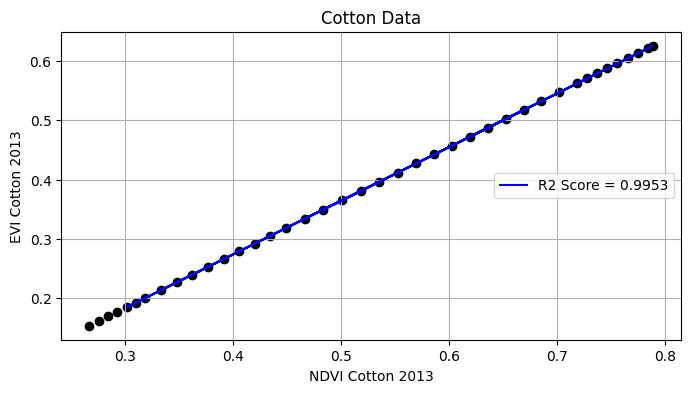

In [140]:
fig = plt.figure(figsize=(8,4))

plt.scatter(ndvi_cotton13, yhat_cotton_evi, color="black")
plt.plot(X_test6, yhat_cotton_evi_ndvi, "b-", label = 'R2 Score = %0.4f' % r2_score(evi_cotton13.values.reshape(-1, 1), yhat_cotton_evi))
plt.xlabel("NDVI Cotton 2013") 
plt.ylabel("EVI Cotton 2013") 
plt.legend(loc="center right")
plt.title("Cotton Data")
plt.grid()

Here we can compare with excel output: 

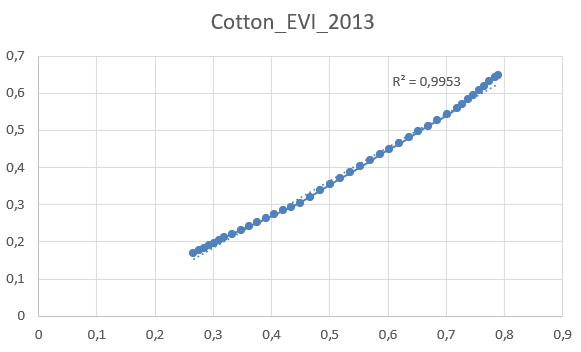


We see that we have a consistent approach according to excel data.

### Manual Calculation Part

In [69]:
X_b6 = np.c_[np.ones((len(evi_cotton13), 1)), evi_cotton13]

In [70]:
w_estimate6 = np.linalg.inv(X_b6.T.dot(X_b6)).dot(X_b6.T).dot(ndvi_cotton13) 

In [71]:
x_new6 = np.array([[0.16], [0.64]])
x_new_b6 = np.c_[np.ones((2, 1)), x_new6]

y_predict6 = x_new_b6.dot(w_estimate6)     

In [72]:
y_predict6

array([0.27465439, 0.80383272])

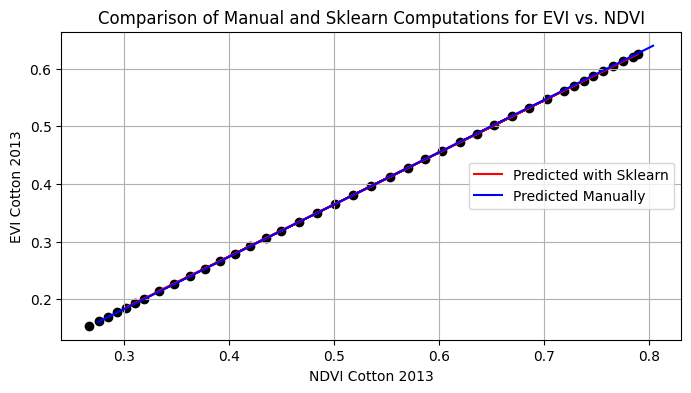

In [141]:
fig = plt.figure(figsize=(8,4))

plt.scatter(ndvi_cotton13, yhat_cotton_evi, color="black")
plt.plot(X_test6, yhat_cotton_evi_ndvi, "r-", label="Predicted with Sklearn")
plt.plot(y_predict6, x_new6, "b-", label="Predicted Manually")
plt.xlabel("NDVI Cotton 2013") 
plt.ylabel("EVI Cotton 2013") 
plt.title("Comparison of Manual and Sklearn Computations for EVI vs. NDVI")
plt.legend(loc="center right")
plt.grid()

In [74]:
calculateCI(x_new6, y_predict6)

[1.1024548559267744, 0.09826161189446944]

In [75]:
model_cotton_evi.coef_[0][0], model_cotton_evi.intercept_[0]

(0.9028165586775293, -0.08688236151627315)

As we can see, our manual prediction line and sklearn's prediction line is close to each other this time.

# QUESTION 3

## Corn Data

### Predicting NDVI 2014 Using NDVI 2013

In [76]:

model_corn_ndvi14 = LinearRegression()
model_corn_ndvi14.fit(ndvi_corn13.values.reshape(-1, 1), ndvi_corn14.values.reshape(-1, 1))

yhat_corn_ndvi14 = model_corn_ndvi14.predict(ndvi_corn13.values.reshape(-1, 1))


In [77]:
r2_score(ndvi_corn14.values.reshape(-1, 1), yhat_corn_ndvi14)

0.9888310303884165

In [145]:
X_train7, X_test7, y_train7, y_test7 = train_test_split(ndvi_corn13, yhat_corn_ndvi14, test_size = 0.2)

In [146]:
model_corn_ndvi_ndvi14 = LinearRegression()

model_corn_ndvi_ndvi14.fit(X_train7.values.reshape(-1, 1), y_train7)

yhat_corn_ndvi_ndvi14 = model_corn_ndvi_ndvi14.predict(X_test7.values.reshape(-1, 1))

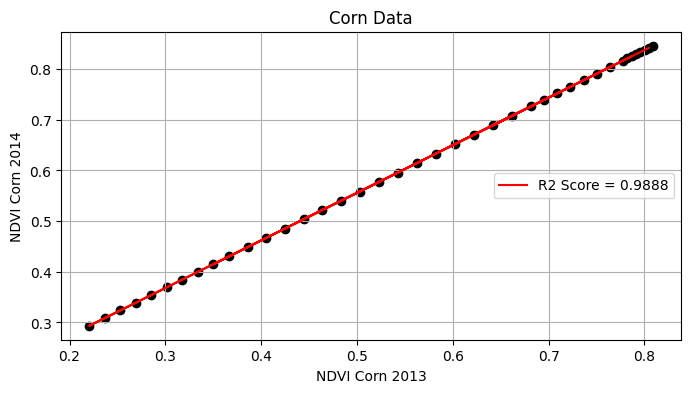

In [147]:
fig = plt.figure(figsize=(8,4))

plt.scatter(ndvi_corn13, yhat_corn_ndvi14, color="black")
plt.plot(X_test7, yhat_corn_ndvi_ndvi14, "r-", label = 'R2 Score = %0.4f' % r2_score(ndvi_corn14.values.reshape(-1, 1), yhat_corn_ndvi14))
plt.title("")
plt.xlabel("NDVI Corn 2013") 
plt.ylabel("NDVI Corn 2014") 
plt.title("Corn Data")
plt.legend(loc="center right")
plt.grid()

Here we can compare with excel output: 

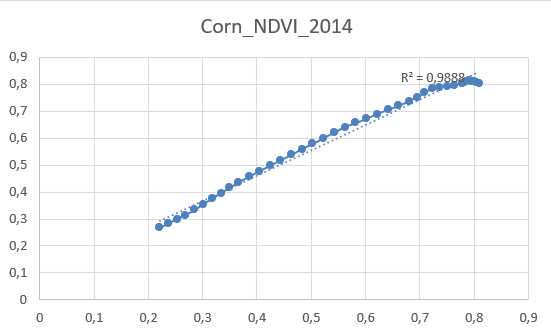

We see that we have a consistent approach according to excel data.

###  Predicting MSAVI 2014 Using NDVI 2013 

In [81]:

model_corn_msavi14 = LinearRegression()
model_corn_msavi14.fit(ndvi_corn13.values.reshape(-1, 1), msavi_corn14.values.reshape(-1, 1))

yhat_corn_msavi14 = model_corn_msavi14.predict(ndvi_corn13.values.reshape(-1, 1))


In [82]:
r2_score(msavi_corn14.values.reshape(-1, 1), yhat_corn_msavi14)

0.9983457829894631

In [83]:
X_train8, X_test8, y_train8, y_test8 = train_test_split(ndvi_corn13, yhat_corn_msavi14, test_size = 0.2)

In [84]:
model_corn_msavi_ndvi14 = LinearRegression()

model_corn_msavi_ndvi14.fit(X_train8.values.reshape(-1, 1), y_train8)

yhat_corn_msavi_ndvi14 = model_corn_msavi_ndvi14.predict(X_test8.values.reshape(-1, 1))

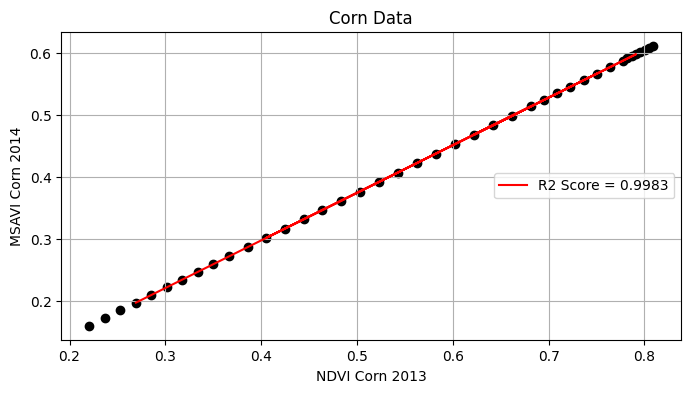

In [85]:
fig = plt.figure(figsize=(8,4))

plt.scatter(ndvi_corn13, yhat_corn_msavi14, color="black")
plt.plot(X_test8, yhat_corn_msavi_ndvi14, "r-", label = 'R2 Score = %0.4f' % r2_score(msavi_corn14.values.reshape(-1, 1), yhat_corn_msavi14))
plt.title("")
plt.xlabel("NDVI Corn 2013") 
plt.ylabel("MSAVI Corn 2014") 
plt.title("Corn Data")
plt.legend(loc="center right")
plt.grid()

Here we can compare with excel output: 

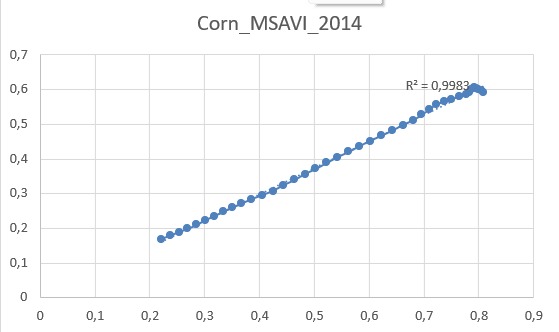

We see that we have a consistent approach according to excel data.

### Predicting EVI 2014 Using NDVI 2013

In [86]:

model_corn_evi14 = LinearRegression()
model_corn_evi14.fit(ndvi_corn13.values.reshape(-1, 1), evi_corn14.values.reshape(-1, 1))

yhat_corn_evi14 = model_corn_evi14.predict(ndvi_corn13.values.reshape(-1, 1))


In [87]:
r2_score(evi_corn14.values.reshape(-1, 1), yhat_corn_evi14)

0.999015238176366

In [88]:
X_train9, X_test9, y_train9, y_test9 = train_test_split(ndvi_corn13, yhat_corn_evi14, test_size = 0.2)

In [89]:
model_corn_evi_ndvi14 = LinearRegression()

model_corn_evi_ndvi14.fit(X_train9.values.reshape(-1, 1), y_train9)

yhat_corn_evi_ndvi14 = model_corn_evi_ndvi14.predict(X_test9.values.reshape(-1, 1))

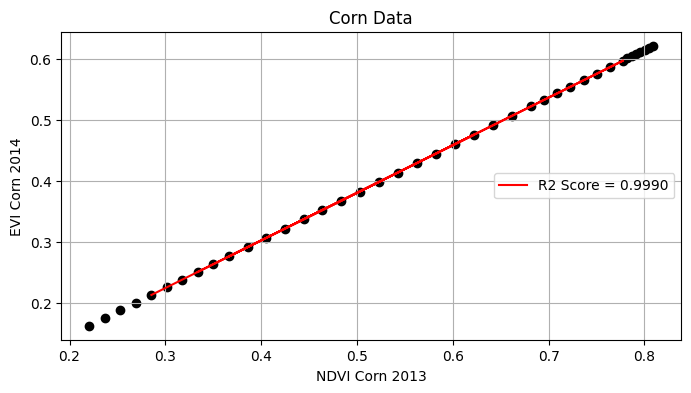

In [90]:
fig = plt.figure(figsize=(8,4))

plt.scatter(ndvi_corn13, yhat_corn_evi14, color="black")
plt.plot(X_test9, yhat_corn_evi_ndvi14, "r-", label = 'R2 Score = %0.4f' % r2_score(evi_corn14.values.reshape(-1, 1), yhat_corn_evi14))
plt.title("")
plt.xlabel("NDVI Corn 2013") 
plt.ylabel("EVI Corn 2014") 
plt.title("Corn Data")
plt.legend(loc="center right")
plt.grid()

Here we can compare with excel output: 

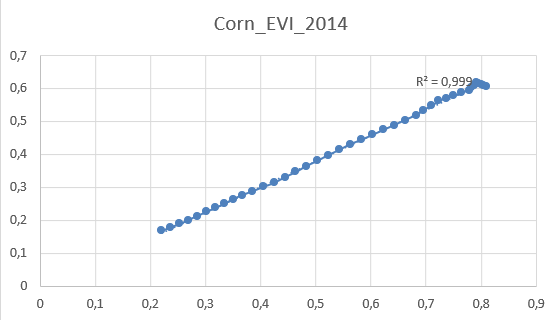

We see that we have a consistent approach according to excel data.

## Cotton Data

### Predicting NDVI 2014 Using NDVI 2013

In [91]:

model_cotton_ndvi14 = LinearRegression()
model_cotton_ndvi14.fit(ndvi_cotton13.values.reshape(-1, 1), ndvi_cotton14.values.reshape(-1, 1))

yhat_cotton_ndvi14 = model_cotton_ndvi14.predict(ndvi_cotton13.values.reshape(-1, 1))


In [92]:
r2_score(ndvi_cotton14.values.reshape(-1, 1), yhat_cotton_ndvi14)

0.990903137114274

In [93]:
X_train10, X_test10, y_train10, y_test10 = train_test_split(ndvi_cotton13, yhat_cotton_ndvi14, test_size = 0.2)

In [94]:
model_cotton_ndvi_ndvi14 = LinearRegression()

model_cotton_ndvi_ndvi14.fit(X_train10.values.reshape(-1, 1), y_train10)

yhat_cotton_ndvi_ndvi14 = model_cotton_ndvi_ndvi14.predict(X_test10.values.reshape(-1, 1))

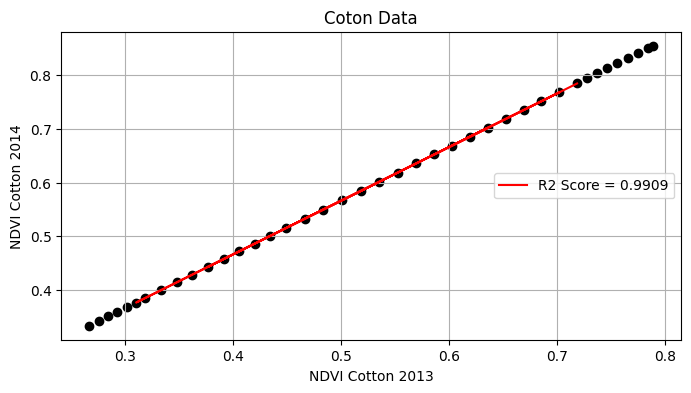

In [95]:
fig = plt.figure(figsize=(8,4))

plt.scatter(ndvi_cotton13, yhat_cotton_ndvi14, color="black")
plt.plot(X_test10, yhat_cotton_ndvi_ndvi14, "r-", label = 'R2 Score = %0.4f' % r2_score(ndvi_cotton14.values.reshape(-1, 1), yhat_cotton_ndvi14))
plt.title("")
plt.xlabel("NDVI Cotton 2013") 
plt.ylabel("NDVI Cotton 2014") 
plt.title("Coton Data")
plt.legend(loc="center right")
plt.grid()

Here we can compare with excel output: 

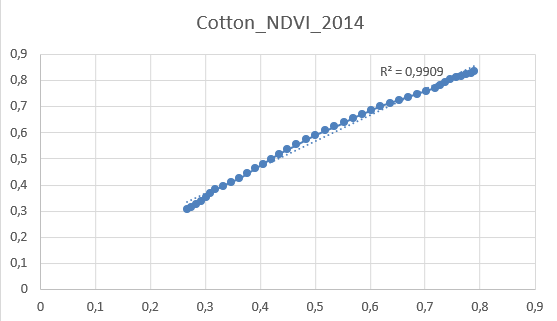

We see that we have a consistent approach according to excel data.

###  Predicting MSAVI 2014 Using NDVI 2013 

In [96]:

model_cotton_msavi14 = LinearRegression()
model_cotton_msavi14.fit(ndvi_cotton13.values.reshape(-1, 1), msavi_cotton14.values.reshape(-1, 1))

yhat_cotton_msavi14 = model_cotton_msavi14.predict(ndvi_cotton13.values.reshape(-1, 1))


In [97]:
r2_score(msavi_cotton14.values.reshape(-1, 1), yhat_cotton_msavi14)

0.9992238392333975

In [98]:
X_train11, X_test11, y_train11, y_test11 = train_test_split(ndvi_cotton13, yhat_cotton_msavi14, test_size = 0.2)

In [99]:
model_cotton_msavi_ndvi14 = LinearRegression()

model_cotton_msavi_ndvi14.fit(X_train11.values.reshape(-1, 1), y_train11)

yhat_cotton_msavi_ndvi14 = model_cotton_msavi_ndvi14.predict(X_test11.values.reshape(-1, 1))

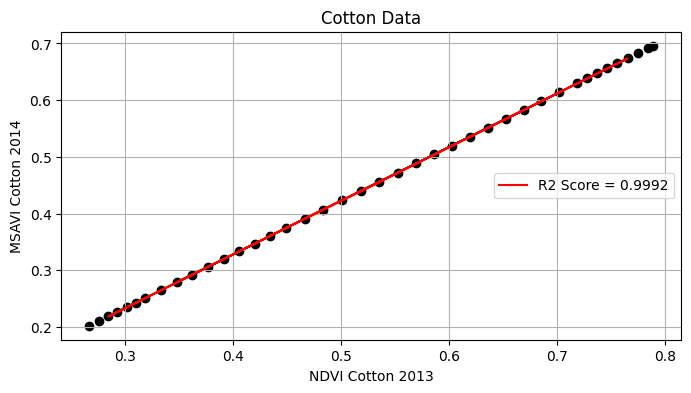

In [100]:
fig = plt.figure(figsize=(8,4))

plt.scatter(ndvi_cotton13, yhat_cotton_msavi14, color="black")
plt.plot(X_test11, yhat_cotton_msavi_ndvi14, "r-", label = 'R2 Score = %0.4f' % r2_score(msavi_cotton14.values.reshape(-1, 1), yhat_cotton_msavi14))
plt.title("")
plt.xlabel("NDVI Cotton 2013") 
plt.ylabel("MSAVI Cotton 2014") 
plt.title("Cotton Data")
plt.legend(loc="center right")
plt.grid()

Here we can compare with excel output: 

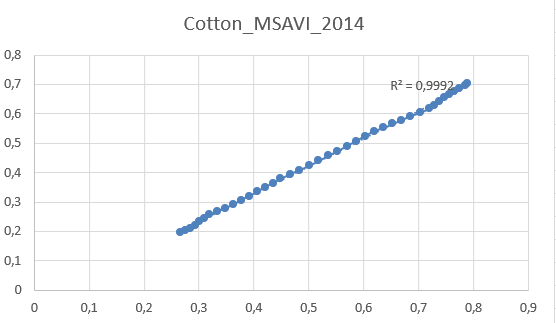

We see that we have a consistent approach according to excel data.

### Predicting EVI 2014 Using NDVI 2013

In [101]:

model_cotton_evi14 = LinearRegression()
model_cotton_evi14.fit(ndvi_cotton13.values.reshape(-1, 1), evi_cotton14.values.reshape(-1, 1))

yhat_cotton_evi14 = model_cotton_evi14.predict(ndvi_cotton13.values.reshape(-1, 1))


In [102]:
r2_score(evi_cotton14.values.reshape(-1, 1), yhat_cotton_evi14)

0.9991534580554188

In [151]:
X_train12, X_test12, y_train12, y_test12 = train_test_split(ndvi_cotton13, yhat_cotton_evi14, test_size = 0.2)

In [152]:
model_cotton_evi_ndvi14 = LinearRegression()

model_cotton_evi_ndvi14.fit(X_train12.values.reshape(-1, 1), y_train12)

yhat_cotton_evi_ndvi14 = model_cotton_evi_ndvi14.predict(X_test12.values.reshape(-1, 1))

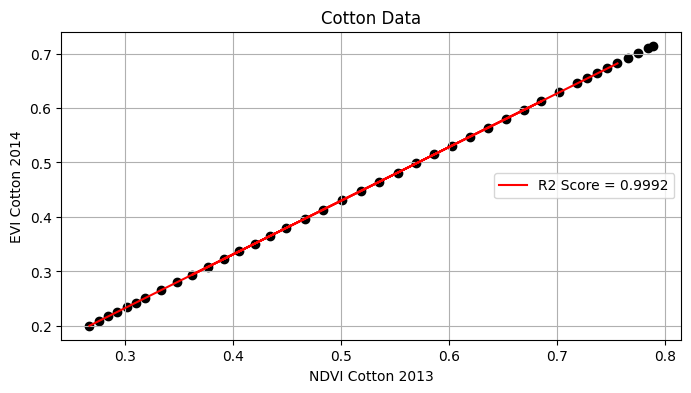

In [153]:
fig = plt.figure(figsize=(8,4))

plt.scatter(ndvi_cotton13, yhat_cotton_evi14, color="black")
plt.plot(X_test12, yhat_cotton_evi_ndvi14, "r-", label = 'R2 Score = %0.4f' % r2_score(evi_cotton14.values.reshape(-1, 1), yhat_cotton_evi14))
plt.title("")
plt.xlabel("NDVI Cotton 2013") 
plt.ylabel("EVI Cotton 2014") 
plt.title("Cotton Data")
plt.legend(loc="center right")
plt.grid()

Here we can compare with excel output: 

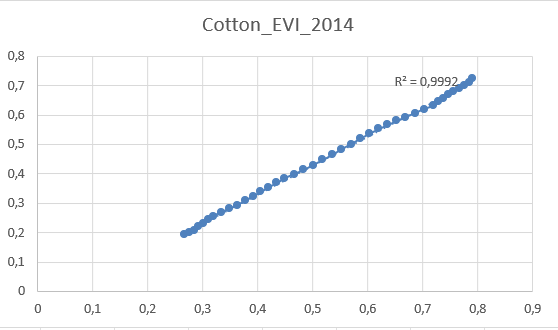

We see that we have a consistent approach according to excel data.

# CONCLUSION

### About Linear Regression

Linear Regression Is Limited to Linear Relationships
By its nature, linear regression only looks at linear relationships between dependent and independent variables. That is, it assumes there is a straight-line relationship between them. Sometimes this is incorrect. For example, the relationship between income and age is curved, i.e., income tends to rise in the early parts of adulthood, flatten out in later adulthood and decline after people retire. You can tell if this is a problem by looking at graphical representations of the relationships.

Linear regression looks at a relationship between the mean of the dependent variable and the independent variables. For example, if you look at the relationship between the birth weight of infants and maternal characteristics such as age, linear regression will look at the average weight of babies born to mothers of different ages. However, sometimes you need to look at the extremes of the dependent variable, e.g., babies are at risk when their weights are low, so you would want to look at the extremes in this example.

Linear Regression Is Sensitive to Outliers
Outliers are data that are surprising. Outliers can be univariate (based on one variable) or multivariate. If you are looking at age and income, univariate outliers would be things like a person who is 118 years old, or one who made $12 million last year. A multivariate outlier would be an 18-year-old who made $200,000. In this case, neither the age nor the income is very extreme, but very few 18-year-old people make that much money.


Although our data is cleared of outliers, such outliers are always seen in the outside world and linear regression is a problem in these cases.


Although r2 seems high, this is because the data we have has a high linear correlation ratio. However, this will cause problems in larger datasets.

### About Using NDVI for MSAVI, EVI or Future Predictions

First of all, since the data set is very limited, the results we saw were quite high compared to this.

In other words, we saw that we can easily predict 2013 MSAVI, EVI or 2014 NDVI, MSAVI and EVI data with 2013 NDVI data.

However, this may not always be the case. As far as we can observe with the current dataset, it seems that the data has always progressed on a close curve. And so it seems reasonable to make a lot of correct guesses with the 2013 NDVI dataset. However, as we mentioned above, we think that this situation will cause problems in line with the data received in the wider and more distant future.